## Abstract

El siguiente dataset tiene datos que abarcan un amplio espectro de juegos lanzados desde 2006 hasta 2023, proporcionando una visión detallada de la industria de los videojuegos. Los juegos representan una variedad de géneros, desde acción hasta juegos casuales y estratégicos. Estos datos resaltan la importancia de desarrolladores y editores reconocidos, así como tecnologías utilizadas en el desarrollo.

La diversidad de géneros presentados refleja la amplitud de experiencias de juego disponibles. Los desarrolladores de renombre, como CAPCOM y Bethesda Softworks, tienen un papel significativo en la industria, pero también hay ejemplos de juegos independientes exitosos. La tecnología desempeña un papel crucial, con motores de juego como Unity y Unreal Engine, así como SDKs específicos, impulsando la innovación en el diseño de juegos.

La satisfacción del jugador es un aspecto esencial, y la mayoría de los juegos obtienen revisiones positivas, con un promedio de calificación superior al 90%. Además, se analiza el crecimiento de la audiencia con picos de jugadores simultáneos en las primeras 24 horas y en cualquier momento posterior al lanzamiento.

En resumen, este conjunto de datos ofrece una visión completa de la industria de los videojuegos, destacando la diversidad de géneros, la influencia de desarrolladores y editores, la tecnología y la satisfacción del jugador. La industria continúa cautivando a una audiencia global y evoluciona constantemente para satisfacer las cambiantes preferencias de los jugadores. Cabe destacar tambien que todos estos datos, provienen de juegos publicados en la plataforma STEAM, siendo una de las plataformas digitales de distribución de videojuegos y software mas conocidas y utilizadas a nivel mundial, fue desarrollada por Valve Corporation, una empresa de videojuegos con sede en los Estados Unidos.

## Preguntas de Interes

¿Cuáles son los géneros más populares?
¿Hay una correlación entre los ratings positivos y el número pico de jugadores?
¿Los juegos desarrollados por compañías de renombre tienen más probabilidades de recibir revisiones positivas?
¿Los juegos que tienen revisiones positivas tienden a alcanzar mayores picos de jugadores?
¿Hay alguna correlación entre el género de un juego y las tecnologías utilizadas en su desarrollo?
¿Los juegos de ciertos géneros tienden a utilizar tecnologías específicas?
¿Como viene evolucionando la industria en los ultimos años?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import seaborn as sns


In [2]:
dfCatalogo_Steam = pd.read_csv('game_data_all.csv')
print(dfCatalogo_Steam.head())

   Unnamed: 0                              game           link     release  \
0           0                       Pizza Tower  /app/2231450/  2023-01-26   
1           1                   Resident Evil 4  /app/2050650/  2023-03-24   
2           2  The Murder of Sonic the Hedgehog  /app/2324650/  2023-03-31   
3           3                Pineapple on pizza  /app/2263010/  2023-03-28   
4           4                        Hi-Fi RUSH  /app/1817230/  2023-01-25   

   peak_players  positive_reviews  negative_reviews  total_reviews  rating  \
0          4529             19807               227          20034   96.39   
1        168191             61752              1616          63368   95.75   
2         15543             12643               213          12856   95.54   
3          1415             11717               209          11926   95.39   
4          6132             14152               324          14476   95.09   

  primary_genre                                       store_ge

In [3]:
dfCatalogo_Steam.drop(columns=['Unnamed: 0']) # Aca borre la columna sin nombre donde numeraba los juegos. 

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date
0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25
1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25
2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31
3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28
4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),Strategy (2),Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01
67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),Strategy (2),Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01
67568,Gumboy: Crazy Adventures,/app/2520/,2006-12-19,22,61,60,121,50.32,Unknown Genre (0),"Casual (4), Indie (23)",CINEMAX s.r.o.,CINEMAX s.r.o.,SDK.OpenAL; SDK.Vorbis,2022-11-04,50.0,0,1,22,2008-09-13
67569,Shattered Union,/app/3960/,2006-10-25,13,71,70,141,50.27,Strategy (2),Strategy (2),2K,PopTop,SDK.Bink_Video; SDK.Miles_Sound_System,2019-09-20,50.0,1,2,13,2020-03-15


In [4]:
dfCatalogo_Steam = dfCatalogo_Steam.set_index('game')
print(dfCatalogo_Steam.head())

                                  Unnamed: 0           link     release  \
game                                                                      
Pizza Tower                                0  /app/2231450/  2023-01-26   
Resident Evil 4                            1  /app/2050650/  2023-03-24   
The Murder of Sonic the Hedgehog           2  /app/2324650/  2023-03-31   
Pineapple on pizza                         3  /app/2263010/  2023-03-28   
Hi-Fi RUSH                                 4  /app/1817230/  2023-01-25   

                                  peak_players  positive_reviews  \
game                                                               
Pizza Tower                               4529             19807   
Resident Evil 4                         168191             61752   
The Murder of Sonic the Hedgehog         15543             12643   
Pineapple on pizza                        1415             11717   
Hi-Fi RUSH                                6132             14152  

In [5]:
dfCatalogo_Steam ['primary_genre'].value_counts() 

Indie (23)                    17862
Action (1)                    14723
Adventure (25)                 8247
Casual (4)                     8231
Strategy (2)                   4443
Simulation (28)                4315
RPG (3)                        4191
Free to Play (37)              1877
Racing (9)                     1142
Sports (18)                    1012
Early Access (70)               759
Massively Multiplayer (29)      447
Violent (73)                     97
Unknown Genre (0)                93
Unknown Genre (33)               33
Sexual Content (71)              31
Gore (74)                        22
Nudity (72)                      12
Education (54)                    9
Unknown Genre (34)                4
Design & Illustration (53)        4
Audio Production (52)             1
Video Production (58)             1
Web Publishing (59)               1
Utilities (57)                    1
Game Development (60)             1
Unknown Genre (6)                 1
Unknown Genre (21)          

In [6]:
total_juegos = dfCatalogo_Steam.shape[0]
print("Total de Juegos:", total_juegos)

Total de Juegos: 67571


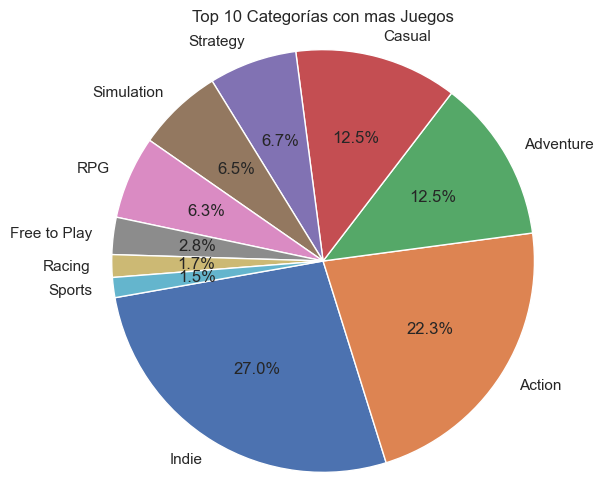

In [7]:
Cantidad_de_Juegos = [17862, 14723, 8247, 8231, 4443, 4315, 4191, 1877, 1142, 1012]

Categorias = ['Indie', 'Action', 'Adventure', 'Casual', 'Strategy','Simulation', 'RPG', 'Free to Play', 'Racing', 'Sports']

data = pd.DataFrame({'Categorias': Categorias, 'Cantidad de Juegos': Cantidad_de_Juegos})

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

plt.pie(data['Cantidad de Juegos'], labels=data['Categorias'], autopct='%1.1f%%', startangle=190)
plt.axis('equal')
plt.title('Top 10 Categorías con mas Juegos')
plt.show()

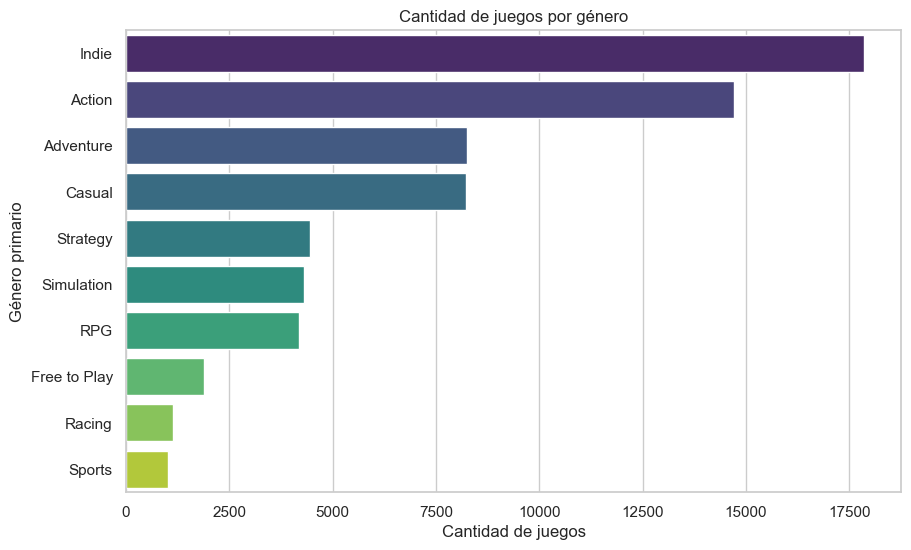

In [8]:
top_10_categories = dfCatalogo_Steam['primary_genre'].value_counts().nlargest(10).index

df_top_10_categories = dfCatalogo_Steam[dfCatalogo_Steam['primary_genre'].isin(top_10_categories)].copy()

df_top_10_categories['primary_genre'] = df_top_10_categories['primary_genre'].str.split('(', n=1).str[0].str.strip()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(y='primary_genre', data=df_top_10_categories, order=df_top_10_categories['primary_genre'].value_counts().index, palette='viridis')

plt.xlabel('Cantidad de juegos')
plt.ylabel('Género primario')
plt.title('Cantidad de juegos por género')
plt.show()

### Insights  #1

Se puede a simple vista identificar que hay 4 categorias principales que agrupan la mayoria de los juegos, voy a trabajar un poco sobre esto, para tener algunos datos.

In [9]:
categorias_principales = ['Indie (23)', 'Action (1)', 'Adventure (25)', 'Casual (4)']
df_top_4 = dfCatalogo_Steam[dfCatalogo_Steam['primary_genre'].isin(categorias_principales)]
total_top_4 = df_top_4.shape[0]
print("Total de Juegos en el Top 4:", total_top_4)

Total de Juegos en el Top 4: 49063


In [10]:
total_juegos = 67571
total_top_4 = 49063

porcentaje_top_4 = (total_top_4 / total_juegos) * 100
porcentaje_entero = int(porcentaje_top_4)
porcentaje_con_simbolo = str(porcentaje_entero) + '%'

print("Porcentaje total de juegos en el top 4 categorias:", porcentaje_con_simbolo)

Porcentaje total de juegos en el top 4 categorias: 72%


### Insights  #2

Sabieno que el %72 corresponden a solo 4 categorias (Indie, Action, Adventure, Casual), podemos decir que hay un claro denominador comun en esta 4 categorias. Voy a invesigar un poco mas este tema.

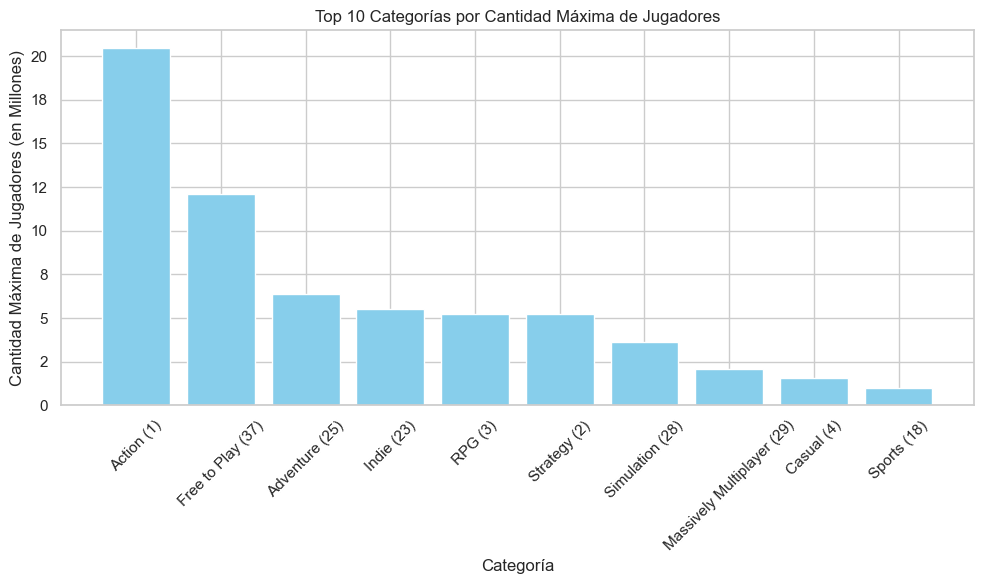

In [11]:
top_10_categorias = dfCatalogo_Steam.groupby('primary_genre')['peak_players'].sum().nlargest(10)

valores_en_millones = top_10_categorias.values / 1000000  # Convertir a millones

plt.figure(figsize=(10, 6))
plt.bar(top_10_categorias.index, valores_en_millones, color='skyblue')

plt.xlabel('Categoría')
plt.ylabel('Cantidad Máxima de Jugadores (en Millones)')
plt.title('Top 10 Categorías por Cantidad Máxima de Jugadores')

plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.tight_layout()
plt.show()

### Insights  #3

Ordenado la cantidad maxima de jugadores de cada categoria, identificamos que: Action, Free To Play, Adventure e Indie, son las 4 categorias con mas jugadores. Salvado la categoria Free to Play podes ver que hay una relacion entre, las categorias con mas juegos y las cateogiras con mas jugadores.                                                                                   

Categorias mas jugadas: Action, Free To play, Adventure, Indie.

Categorias con mas juegos: Indie, Action, Adventura, Casual.

Sabiendo esto podriamos decir que si vamos a desarrollar un juego, haciendolo en las cateogiras de Action, Adventure o Indie tendria tal vez mas probabilidad de alcanzar mas jugadores. Aunque tambien deberiamos tener en cuenta que tendriamos mas competencia. 

In [12]:
Top_10_juegos_mas_jugados = dfCatalogo_Steam.nlargest(10, 'all_time_peak')
print(Top_10_juegos_mas_jugados[['all_time_peak']])

                                  all_time_peak
game                                           
PUBG: BATTLEGROUNDS                     3257248
Counter-Strike: Global Offensive        1818773
Lost Ark                                1325305
Dota 2                                  1295114
Cyberpunk 2077                          1054388
ELDEN RING                               953426
New World                                913634
Hogwarts Legacy                          879308
Goose Goose Duck                         702845
Apex Legends                             624473


In [13]:
Rating_mas_jugados = ["PUBG: BATTLEGROUNDS", "Counter-Strike: Global Offensive", "Lost Ark", "Dota 2", "Cyberpunk 2077", "ELDEN RING", "New World", "Hogwarts Legacy", "Goose Goose Duck", "Apex Legends"]
Ratings = dfCatalogo_Steam.loc[Rating_mas_jugados, 'rating']
print(Ratings)

game
PUBG: BATTLEGROUNDS                 57.04
Counter-Strike: Global Offensive    88.29
Lost Ark                            71.29
Dota 2                              82.17
Cyberpunk 2077                      77.56
ELDEN RING                          91.10
New World                           69.43
Hogwarts Legacy                     91.35
Goose Goose Duck                    86.12
Apex Legends                        82.10
Name: rating, dtype: float64


In [14]:
Rating_Promedio_Mas_Jugados = Ratings.mean()
print(Rating_Promedio_Mas_Jugados)

79.64500000000001


In [15]:
Rating_Promedio_Todos = dfCatalogo_Steam['rating'].mean()
print(Rating_Promedio_Todos)

65.28820825502065


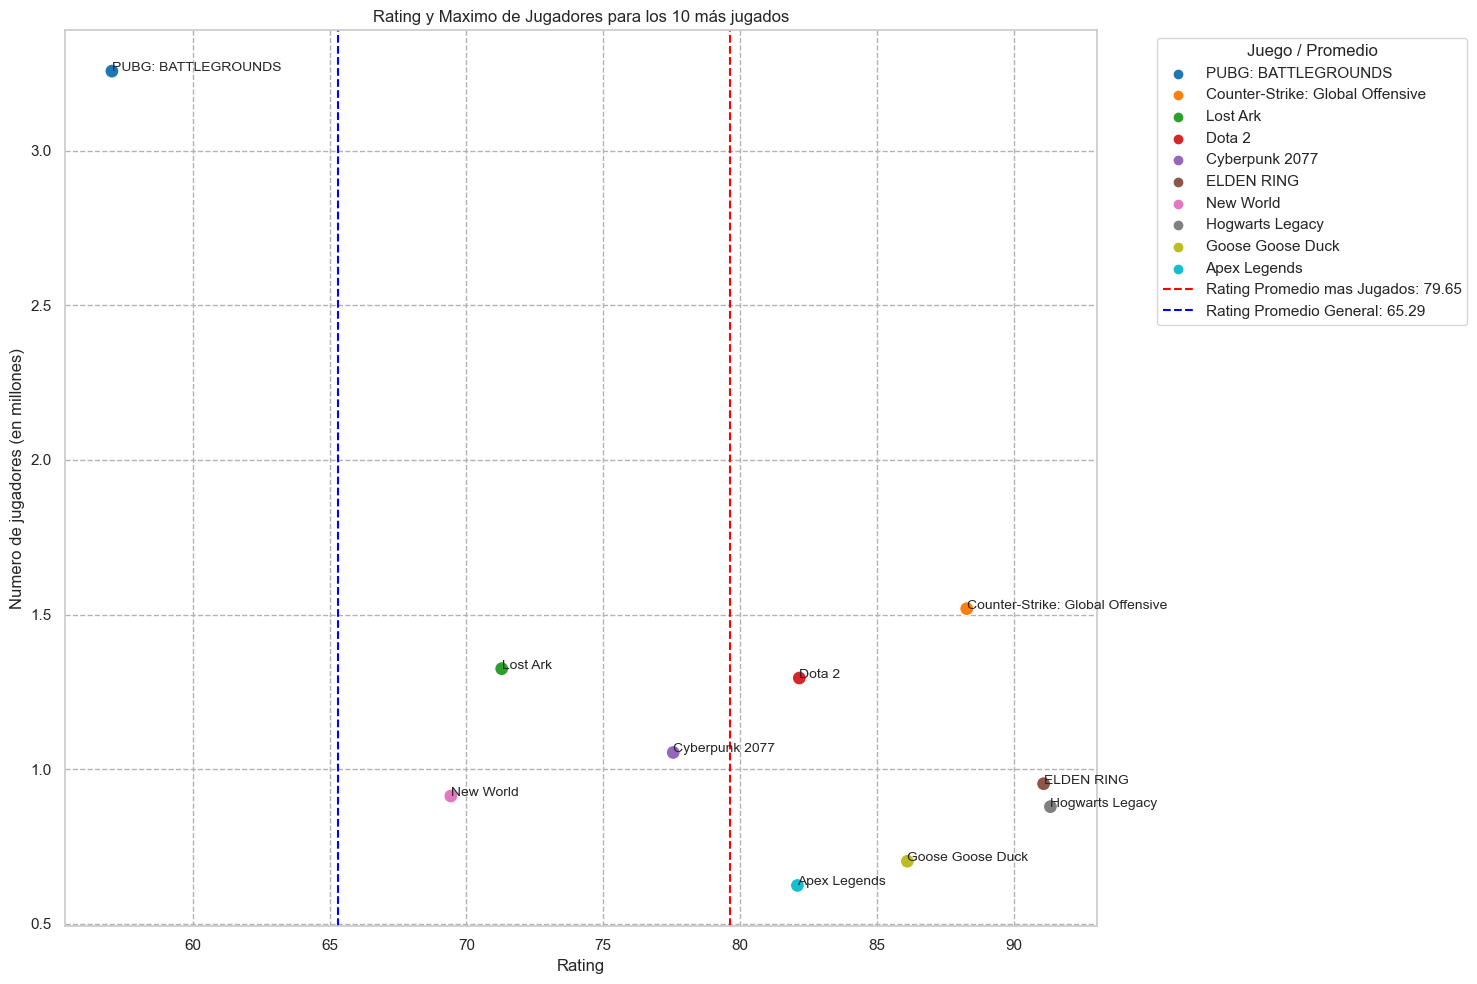

In [16]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=Top_10_juegos_mas_jugados['rating'], y=Top_10_juegos_mas_jugados['peak_players'] / 1_000_000, hue=Top_10_juegos_mas_jugados.index, s=100, palette="tab10")
for index, row in Top_10_juegos_mas_jugados.iterrows():plt.text(row['rating'], row['peak_players'] / 1_000_000, index, fontsize=10)

# Agrego en lineas verticales los dos promedios antes calculados para tenerlos de referencia
plt.axvline(Rating_Promedio_Mas_Jugados, color='red', linestyle='--', label=f"Rating Promedio mas Jugados: {Rating_Promedio_Mas_Jugados:.2f}")
plt.axvline(Rating_Promedio_Todos, color='blue', linestyle='--', label=f"Rating Promedio General: {Rating_Promedio_Todos:.2f}")

plt.title('Rating y Maximo de Jugadores para los 10 más jugados')
plt.xlabel('Rating')
plt.ylabel('Numero de jugadores (en millones)')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(title='Juego / Promedio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
pubg_data = dfCatalogo_Steam.loc['PUBG: BATTLEGROUNDS']
print(pubg_data)

Unnamed: 0                                                           55634
link                                                          /app/578080/
release                                                         2017-12-21
peak_players                                                       3257248
positive_reviews                                                   1235880
negative_reviews                                                    927317
total_reviews                                                      2163197
rating                                                               57.04
primary_genre                                            Free to Play (37)
store_genres             Action (1), Adventure (25), Free to Play (37),...
publisher                                                     KRAFTON Inc.
developer                                                     KRAFTON Inc.
detected_technologies    AntiCheat.AntiCheatExpert; AntiCheat.BattlEye;...
store_asset_mod_time     

### Insights  #4

Analizando los 10 juegos con mas jugadores podemos ver que el raiting promedio de estos es de 79.65. Este valor esta casi 15 puntos puntos por sobre el promedio del raiting general de todos los juegos 65.28. Lo que es un resultado que tiene toda la logica, ya que se espera que el rating de lo juegos mas jugados justamente se espera que sea mayor al resto. 

Un punto interesante a analizar seria el caso partiuclar del juego PUBG, que tiene el mayor pico de jugadores de todos, pero a su vez tiene un raiting menor al promedio genera.
En este dataset no tenemos datos suficiente de la fluctuacion de la cantidad de jugadores a lo largo de tiempo, pero tal vez es un juego que genero mucha expectativa previa al lanzamiento por lo cual tuvo un gran pico de jugadores. Esto tendria tambien cierta logica ya que el pico maximo de jugadores se dio a menos de un mes de lanzamiento y al dia de hoy el juego perdio casi el %92 de los jugadores alcanzados en el pico. 

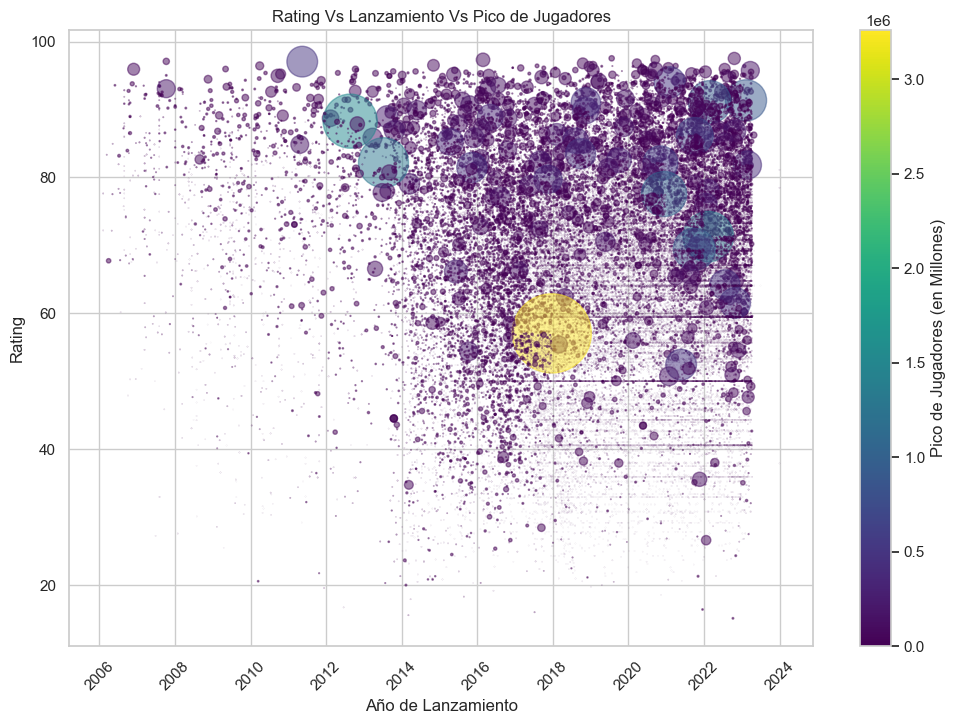

In [18]:
dfCatalogo_Steam['release'] = pd.to_datetime(dfCatalogo_Steam['release'])

x = dfCatalogo_Steam['release']  
y = dfCatalogo_Steam['rating']    
z = dfCatalogo_Steam['peak_players']  

norm = plt.Normalize(dfCatalogo_Steam['peak_players'].min(), dfCatalogo_Steam['peak_players'].max())

cmap = cm.viridis 

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

bubble_sizes = []
for current_peak_players in z:
    current_size = current_peak_players / 1000  
    bubble_sizes.append(current_size)

while len(bubble_sizes) < len(x):
    bubble_sizes.append(0)

bubble_sizes = np.array(bubble_sizes)

fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(x, y, s=bubble_sizes, c=dfCatalogo_Steam['peak_players'], cmap=cmap, norm=norm, alpha=0.5)

ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Rating')
ax.set_title('Rating Vs Lanzamiento Vs Pico de Jugadores')

cbar = plt.colorbar(mappable, ax=ax, label='Pico de Jugadores (en Millones)')

plt.xticks(rotation=45)

plt.show()

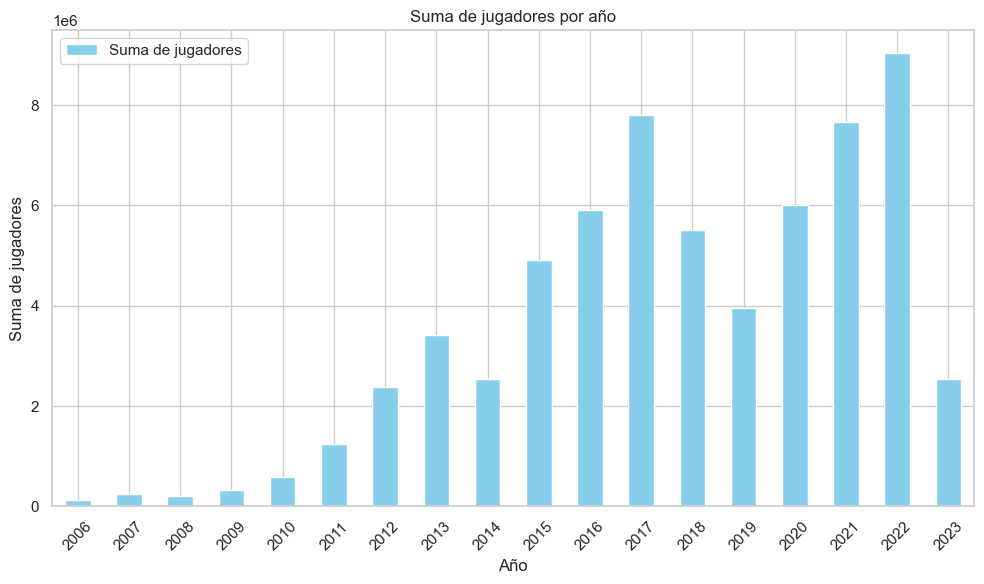

In [19]:
# Convertir la columna 'release' a tipo datetime
dfCatalogo_Steam['release'] = pd.to_datetime(dfCatalogo_Steam['release'])

# Agrupar los datos por año y calcular la suma de jugadores para cada año
players_per_year = dfCatalogo_Steam.groupby(dfCatalogo_Steam['release'].dt.year)['peak_players'].sum()

# Graficar la suma de jugadores por año con el promedio acumulado
plt.figure(figsize=(10, 6))
players_per_year.plot(kind='bar', color='skyblue', label='Suma de jugadores')
plt.xlabel('Año')
plt.ylabel('Suma de jugadores')
plt.title('Suma de jugadores por año')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights  #5

Analizando los ultimos dos graficos me surgen dos hipotesis, la primera es como desde 2006 a 2013/2014 hay un aumento en la cantidad de lanzamientos y de jugadores. Lo que tal vez se puede atribuir a una mayor globalizacion y accesibilidad a la tecnologica a nivel global.

Y la segunda como a partir desde 2017 se ve una caida en el total de jugadores y a partir de 2020 cuando casualmente comienza la pandema ese numero no solo alcanza sino que supera el maximo historio de cantidad de jugadores. 

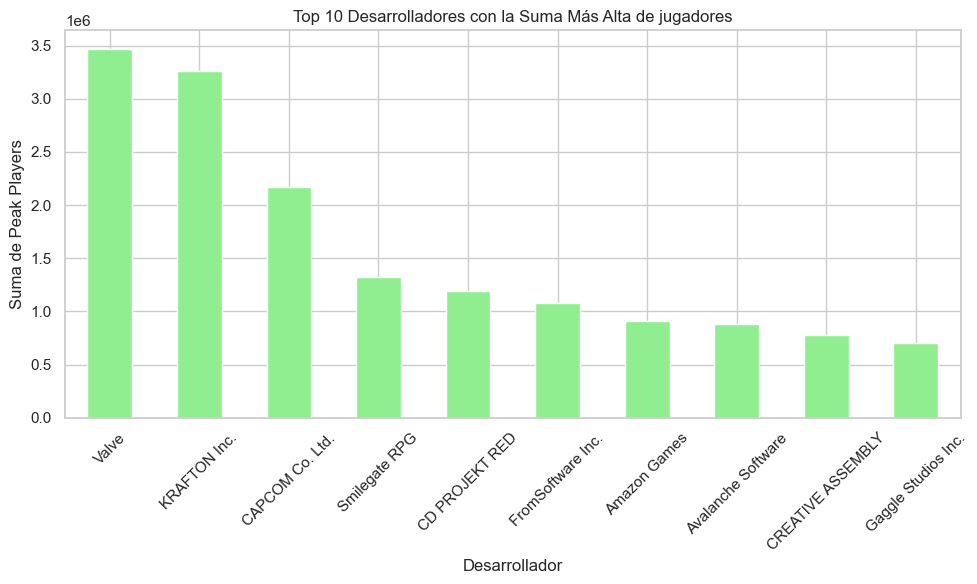

In [20]:
Mayor_cantidad_de_jugadores_por_desarrollador = dfCatalogo_Steam.groupby('developer')['peak_players'].sum()

Mayor_cantidad_de_jugadores_por_desarrollador = Mayor_cantidad_de_jugadores_por_desarrollador.nlargest(10)

plt.figure(figsize=(10, 6))

Mayor_cantidad_de_jugadores_por_desarrollador.plot(kind='bar', color='lightgreen')

plt.xlabel('Desarrollador')
plt.ylabel('Suma de Peak Players')
plt.title('Top 10 Desarrolladores con la Suma Más Alta de jugadores')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()